# Create figs for experimental setup

P. Schuster  
UMich NERS  
Jan 23, 2018  

I'm going to import `det_df` and all that good stuff and make some images. Then I'm going to save them to file here and copy them into my manuscript fig folder.

Or, alternately, I could call for those files from the manuscript folder... Hm, I don't know which is best. 

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd

In [2]:
sys.path.append('../../scripts/')
import bicorr as bicorr
import bicorr_plot as bicorr_plot
import bicorr_math as bicorr_math

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import seaborn as sns

In [5]:
# Improve quality of plots
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load data

In [6]:
help(bicorr.load_det_df)

Help on function load_det_df in module bicorr:

load_det_df(filepath='../meas_info/det_df_pairs_angles.csv', remove_fc_neighbors=False, plot_flag=False)
    Load pandas dataFrame containing detector pair information and angles. This was created in the notebook `detector_pair_angles`.
    
    Parameters
    ----------
    filepath : str, optional
        Path (absolute or relative) to det_df file. May be `det_df.csv` or `det_df.csv`.
        Default location is specific to pfschus folder structure
    remove_fc_neighbors : bool, optional
        Option to remove fission chamber neighbors and reset indices
    plot_flag : bool, optional
        Option to produce plots displaying basic structure of det_df
        Plots will be displayed but not stored
    
    Returns
    -------
    det_df : pandas dataFrame
        dataFrame of detector pair indices and angles



Where is my `det_df` file?

In [7]:
os.listdir('../../meas_info/')

['detector_distances.xlsx',
 'detector_positions.xlsx',
 'det_df.csv',
 'det_df.pkl',
 'det_df_pairs_angles.csv',
 'det_df_pairs_angles.pkl',
 'lanl_detector_angles.mat',
 'lanl_detector_angles_note.md']

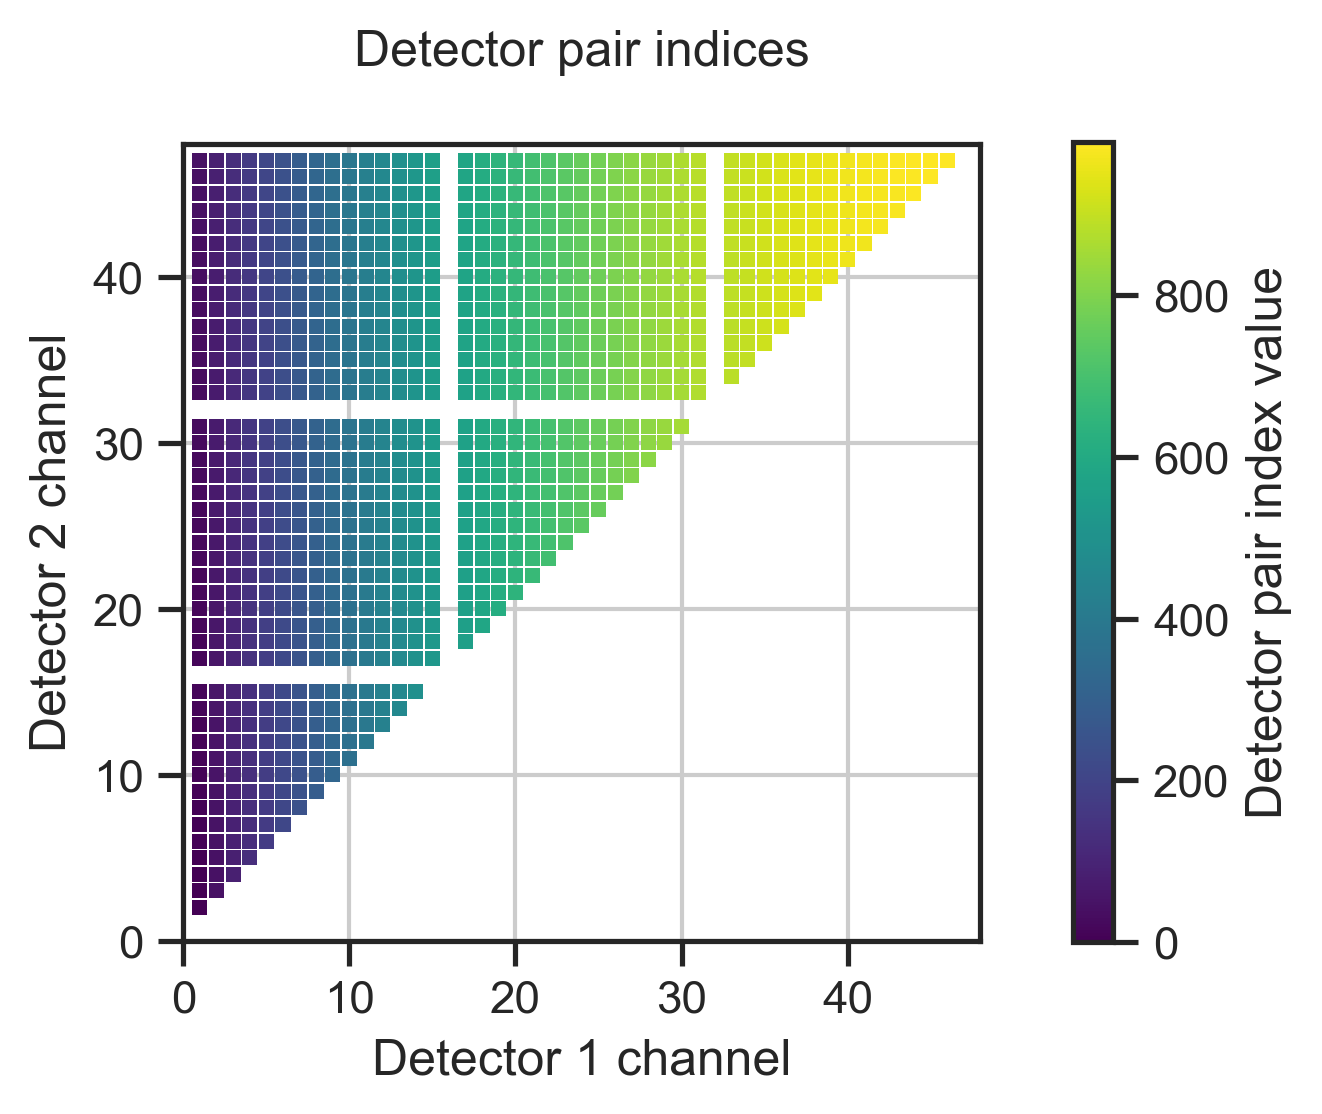

<Figure size 1800x1200 with 0 Axes>

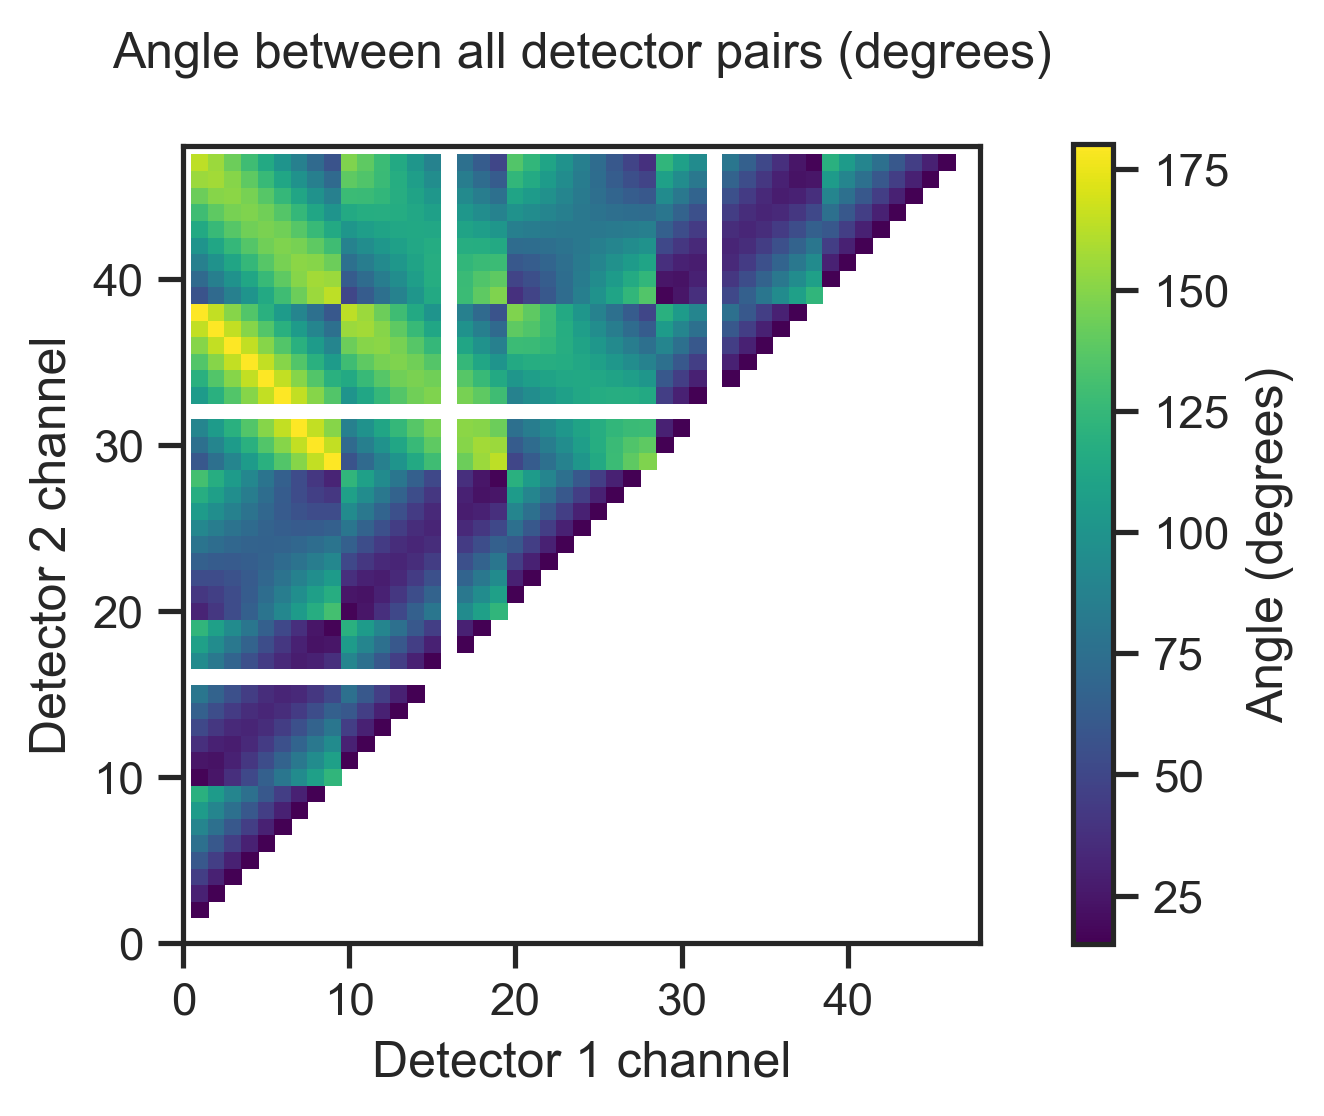

<Figure size 1800x1200 with 0 Axes>

In [8]:
det_df = bicorr.load_det_df('../../meas_info/det_df_pairs_angles.csv', plot_flag=True)

# Plot the distribution of angles

What is the best way to visualize this? I do like the 2d heat map above, but it doesn't make it easy to see the frequency distribution. The original instructions to myself in my latex file say: "Subfigure with 2D on left and histogram on right to show dist of angles for all pairs. I'm not sure what I meant by this before."

I am going to interpret this as the 2D heatmap on the left and the histogram on the right. Go for it!

## 2D heatmap

In [9]:
help(bicorr_plot.plot_det_df)

Help on function plot_det_df in module bicorr_plot:

plot_det_df(det_df, which=['index', 'angle'], cmap='viridis', title_flag=True, save_flag=False, fig_folder='fig', show_flag=True, clear_flag=True)
    Make some plots to visualize the data in det_df, which can be loaded using `load_det_df`.
    
    Parameters
    ----------
    det_df : pandas dataFrame
        dataFrame of detector pair indices and angles
    which : list of str, optional
        Which plots to show? Options include 'index', 'angle'
    cmap : str, optional
        Colormap
    title_flag : bool, optional
    save_flag : bool, optional
        save plots to file
    fig_folder : str, optional
        where to save plots
    show_flag : bool, optional
        display plots
    clear_flag : bool, optional
        whether to clear matplotlib figure
        
    Returns
    -------
    n/a



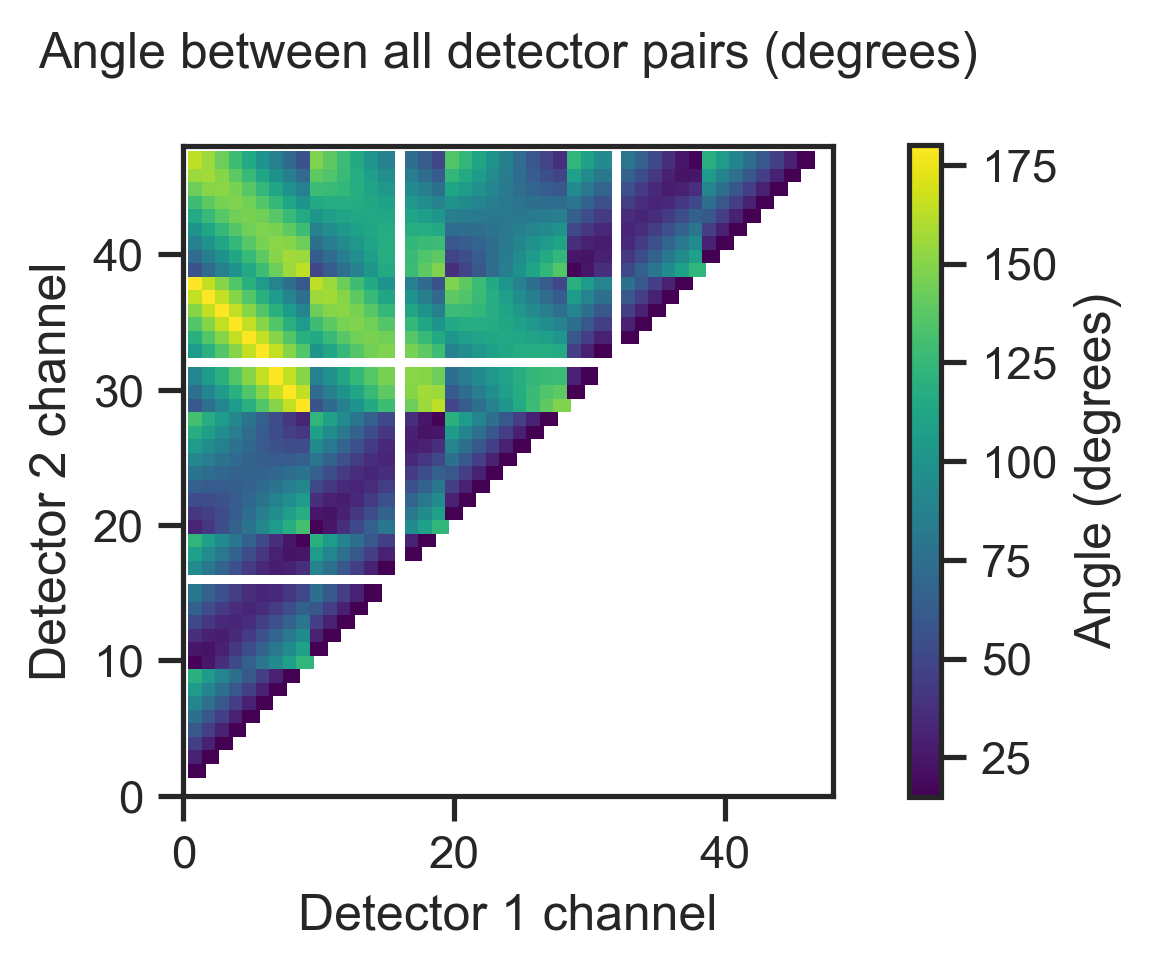

<Figure size 1800x1200 with 0 Axes>

In [10]:
bicorr_plot.plot_det_df(det_df, which = ['angle'], 
                   save_flag = True, fig_folder = 'fig', show_flag = True)

I'm going to import seaborn and see if I can make this look "nicer." Try not clearing, and then change the colorbar, and then display.

In [11]:
#cmap = sns.cubehelix_palette(8,start=.5,rot=-.75,as_cmap=True)
cmap = sns.cubehelix_palette(8,start=2,rot=0,as_cmap=True)
#cmap = matplotlib.colors.ListedColormap(sns.color_palette("GnBu_d").as_hex())

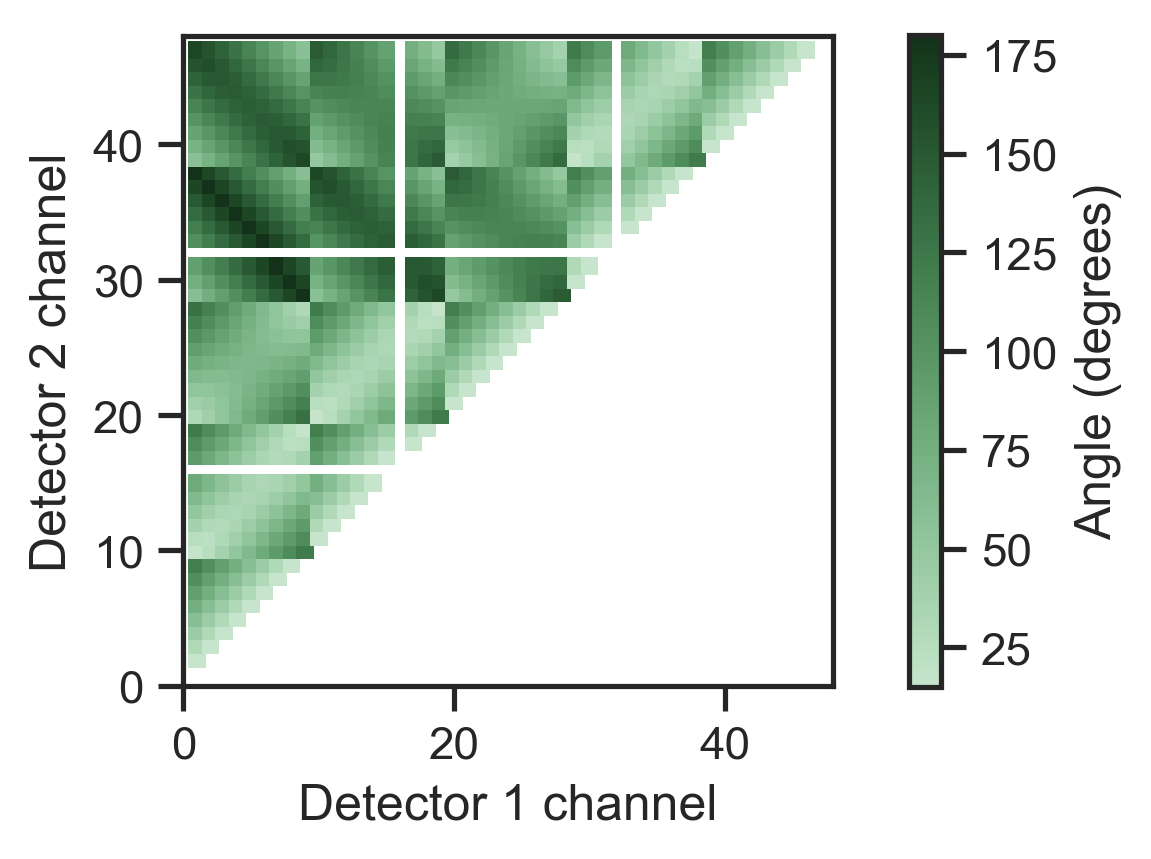

<Figure size 1800x1200 with 0 Axes>

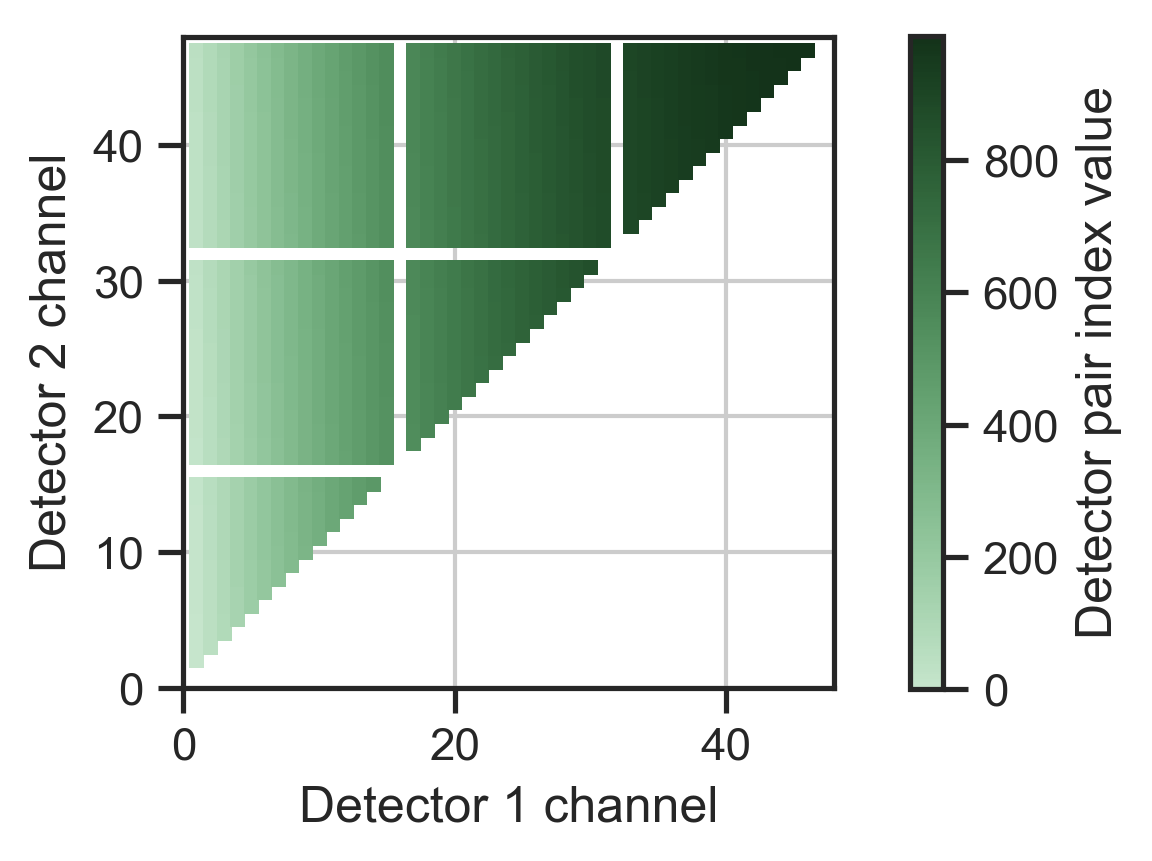

<Figure size 1800x1200 with 0 Axes>

In [12]:
bicorr_plot.plot_det_df(det_df, which=['angle'], cmap=cmap, title_flag=False,
                        save_flag = True)
bicorr_plot.plot_det_df(det_df, which=['index'], cmap=cmap, title_flag=False,
                        save_flag = True)

C:\Users\pfsch\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


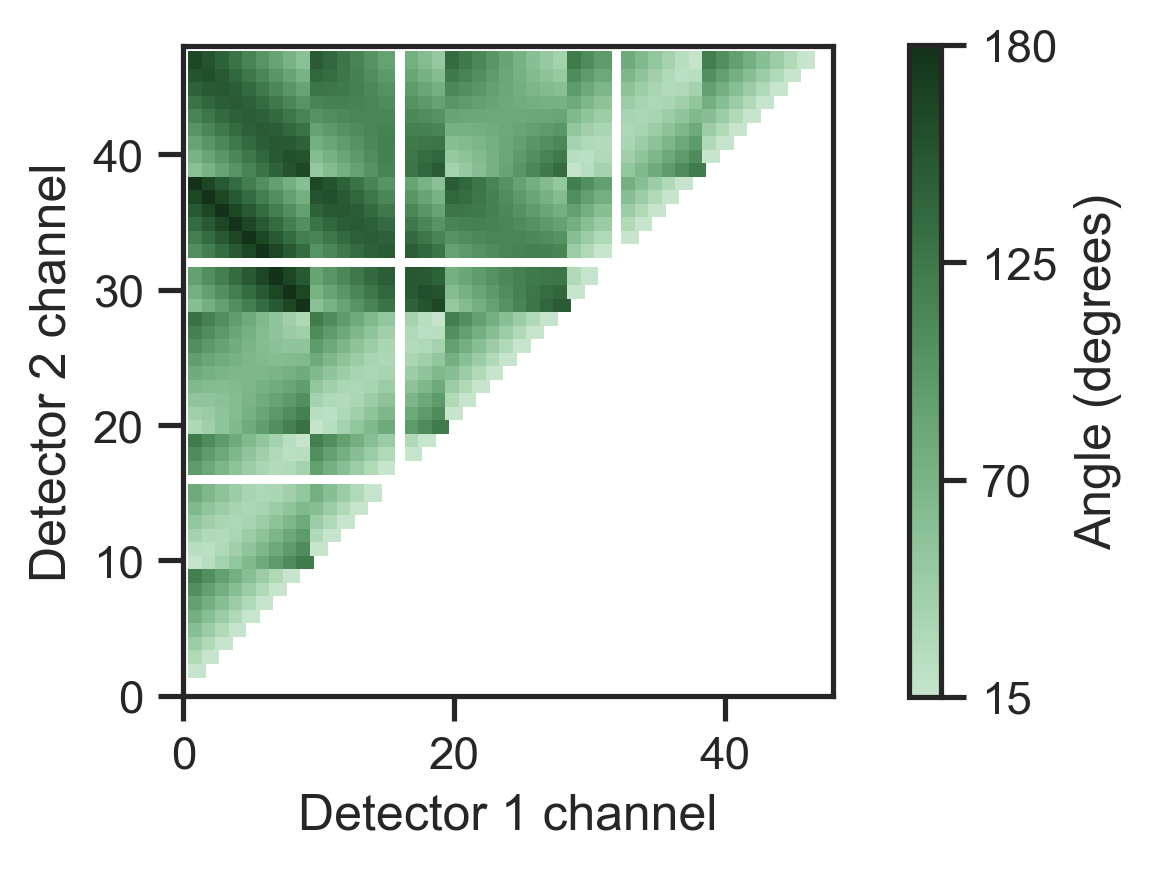

In [13]:
plt.figure(figsize=(4,4)) # Dimensions in inches
plt.scatter(det_df['d1'],det_df['d2'],c=det_df['angle'],s=18,marker='s',edgecolor='none',cmap=cmap)
cbar = plt.colorbar(fraction = 0.043, pad = 0.1, ticks=[15,70,125,180])
cbar.set_label('Angle (degrees)')
plt.xlim([0,48]); plt.ylim([0,48])
plt.xlabel('Detector 1 channel'); plt.ylabel('Detector 2 channel')
plt.axes().set_aspect('equal')
plt.tight_layout()
bicorr_plot.save_fig_to_folder('det_df_angles',extensions=['pdf','png'])
plt.show()

## Histogram of detector angles

In [14]:
angle_bin_edges = np.arange(10.01,181,10)
angle_bin_centers = bicorr_math.calc_centers(angle_bin_edges)

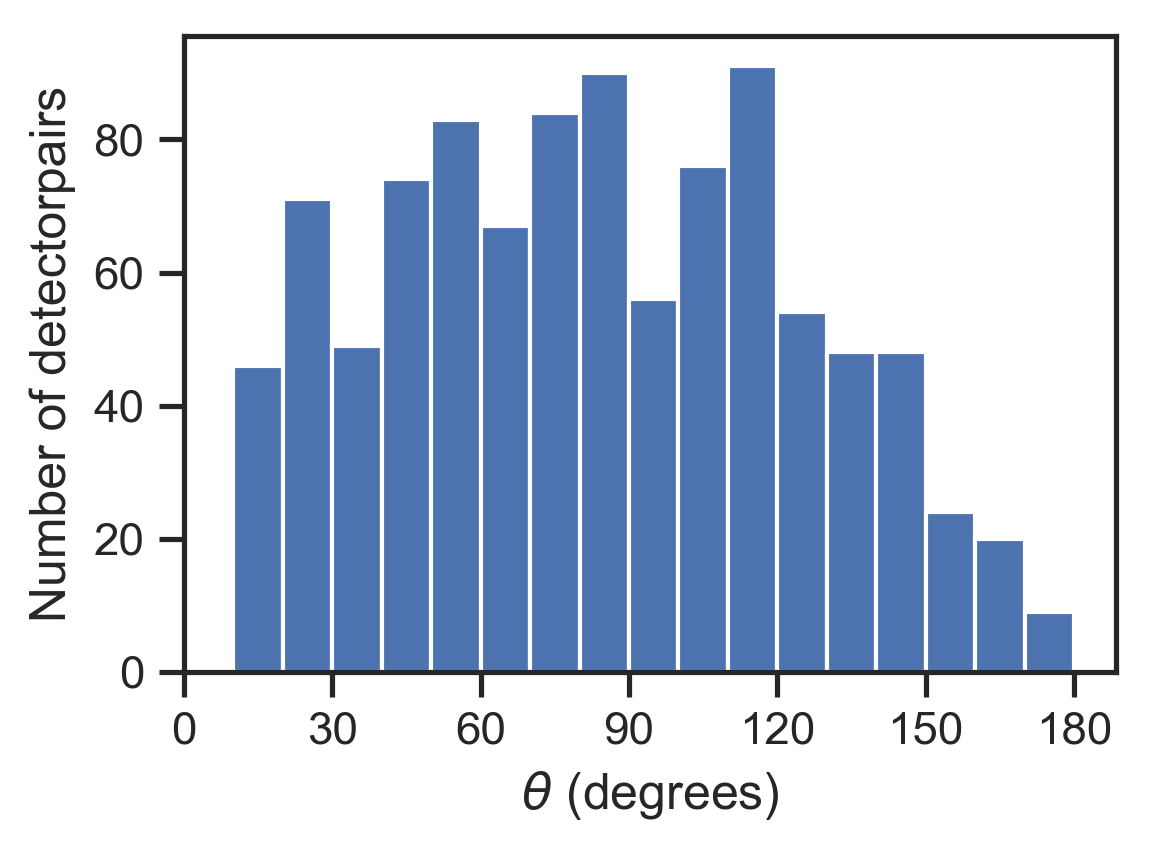

In [15]:
plt.figure(figsize=(4,3))
plt.hist(det_df['angle'],bins=angle_bin_edges)
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Number of detectorpairs')
#plt.axes().set_aspect('equal')
plt.xticks(np.arange(0,181,30))
plt.tight_layout()
#bicorr_plot.save_fig_to_folder('det_df_histogram',extensions=['pdf','png'])
plt.show()

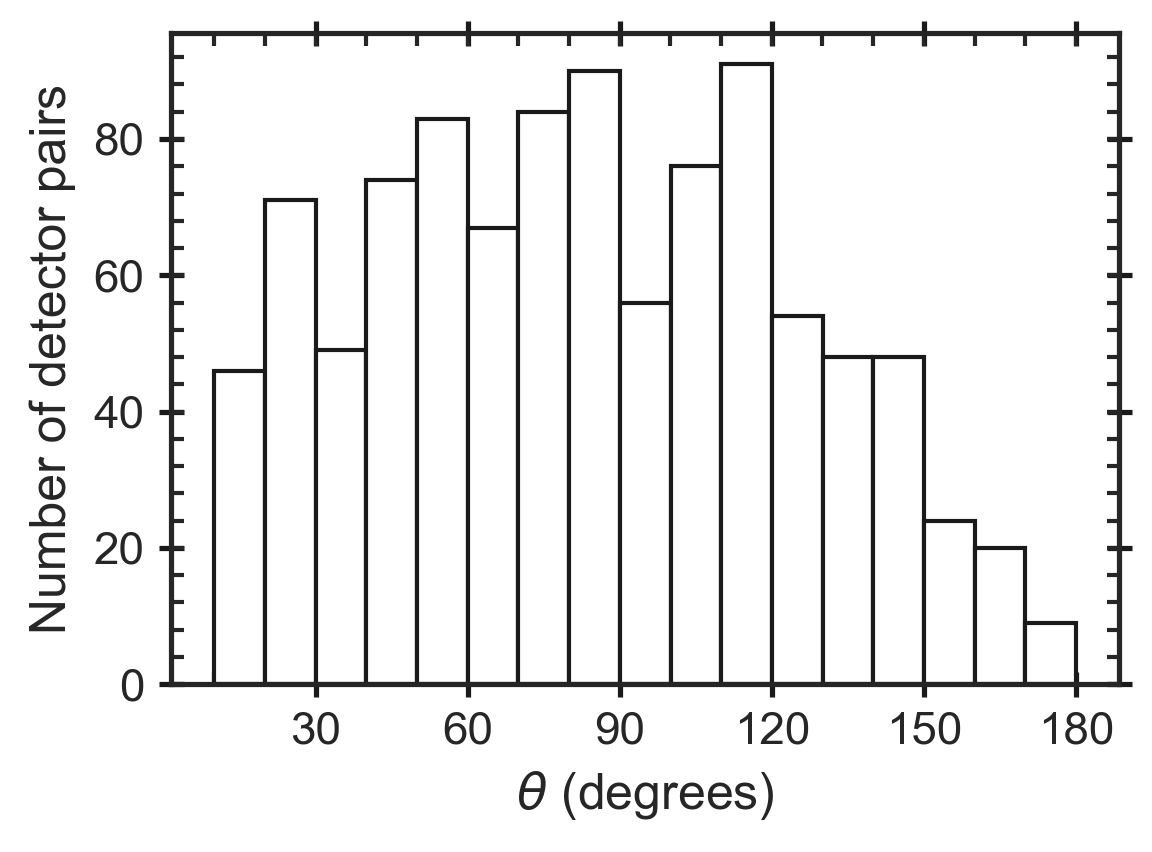

In [16]:
fig = plt.figure(figsize=(4,3))
ax = plt.gca()

ax.hist(det_df['angle'],bins=angle_bin_edges, facecolor='white',edgecolor='k')
ax.set_xlabel(r'$\theta$ (degrees)')
ax.set_ylabel('Number of detector pairs')

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.yaxis.set_major_locator(MultipleLocator(20))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(4))

#plt.axes().set_aspect('equal')
plt.tight_layout()
bicorr_plot.save_fig_to_folder('det_df_histogram',extensions=['pdf','png'])
plt.show()

# Calculate horizontal spread

In [17]:
det_df.head()

,d1,d2,d1d2,angle
0,1,2,102,15.0
1,1,3,103,30.0
2,1,4,104,45.0
3,1,5,105,60.0
4,1,6,106,75.0


In [18]:
det_df['bin'] = np.digitize(det_df['angle'],angle_bin_edges)

In [19]:
max(det_df['bin'].values)

17

## Try making a kde in a single bin

In [20]:
from scipy import stats

In [21]:
bin = 3 # 30 to 40
mask = det_df['bin'] == bin

In [22]:
density = stats.kde.gaussian_kde(det_df[mask]['angle'].values)

In [23]:
print(angle_bin_edges[bin-1])
print(angle_bin_edges[bin])

30.009999999999998
40.00999999999999


In [24]:
x_step = np.arange(angle_bin_edges[bin-1],angle_bin_edges[bin],.1)
x_step

array([30.01, 30.11, 30.21, 30.31, 30.41, 30.51, 30.61, 30.71, 30.81,
       30.91, 31.01, 31.11, 31.21, 31.31, 31.41, 31.51, 31.61, 31.71,
       31.81, 31.91, 32.01, 32.11, 32.21, 32.31, 32.41, 32.51, 32.61,
       32.71, 32.81, 32.91, 33.01, 33.11, 33.21, 33.31, 33.41, 33.51,
       33.61, 33.71, 33.81, 33.91, 34.01, 34.11, 34.21, 34.31, 34.41,
       34.51, 34.61, 34.71, 34.81, 34.91, 35.01, 35.11, 35.21, 35.31,
       35.41, 35.51, 35.61, 35.71, 35.81, 35.91, 36.01, 36.11, 36.21,
       36.31, 36.41, 36.51, 36.61, 36.71, 36.81, 36.91, 37.01, 37.11,
       37.21, 37.31, 37.41, 37.51, 37.61, 37.71, 37.81, 37.91, 38.01,
       38.11, 38.21, 38.31, 38.41, 38.51, 38.61, 38.71, 38.81, 38.91,
       39.01, 39.11, 39.21, 39.31, 39.41, 39.51, 39.61, 39.71, 39.81,
       39.91])

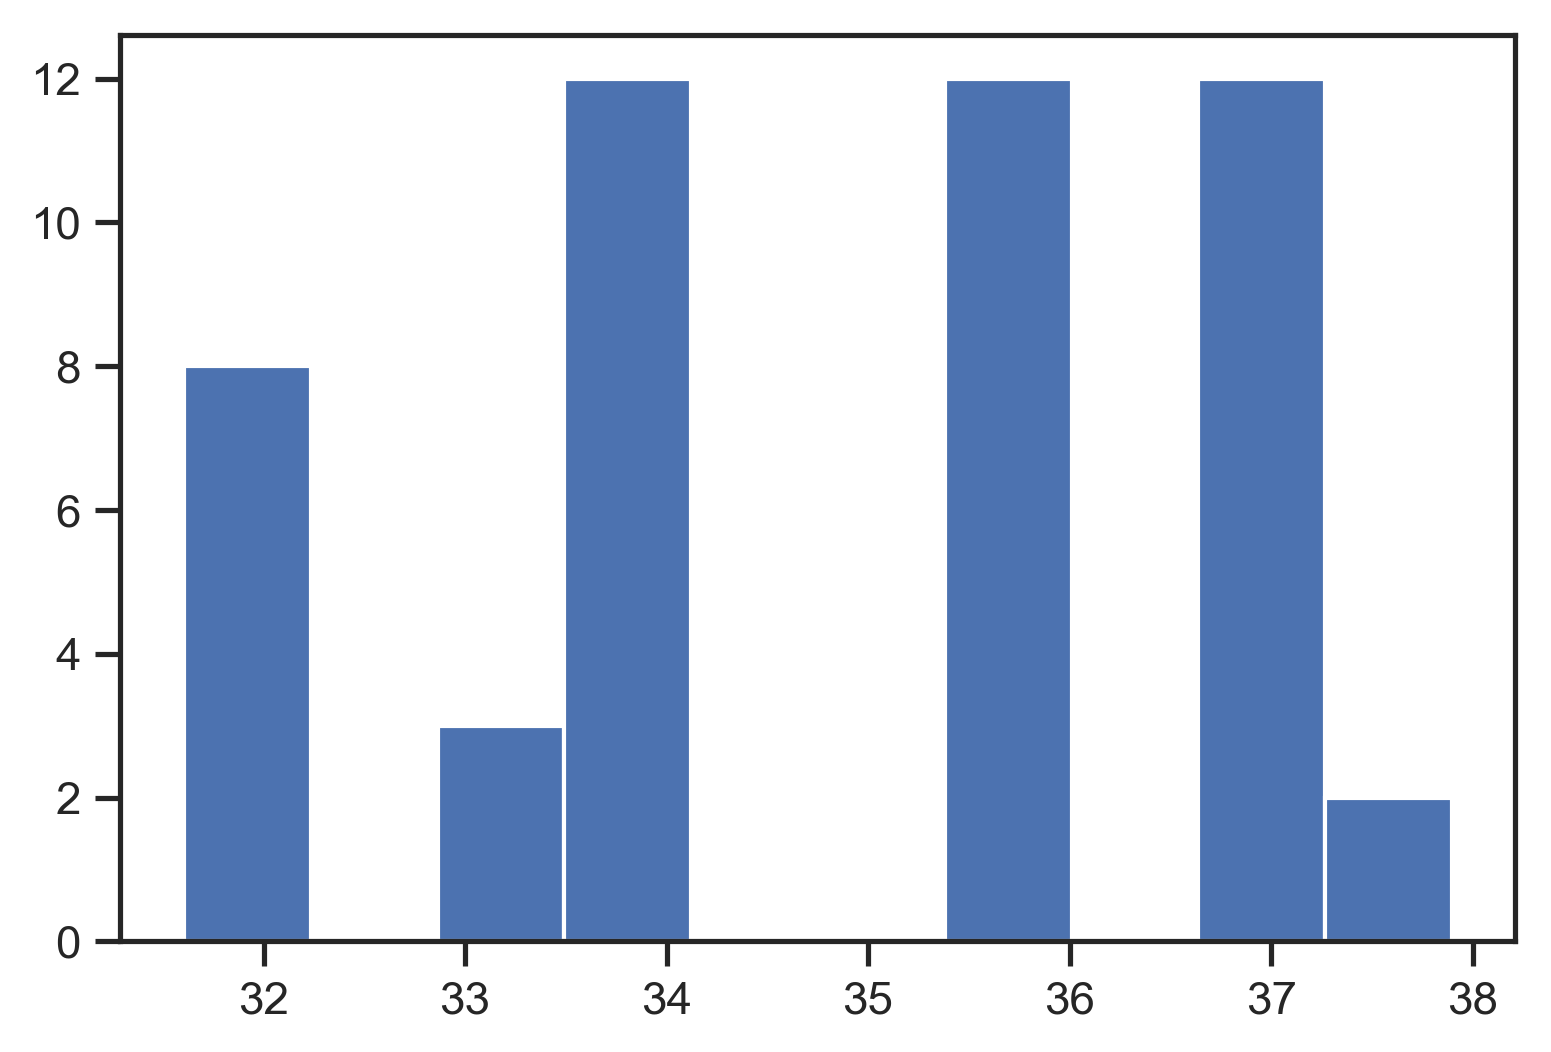

In [25]:
plt.hist(det_df[mask]['angle'].values)
plt.show()

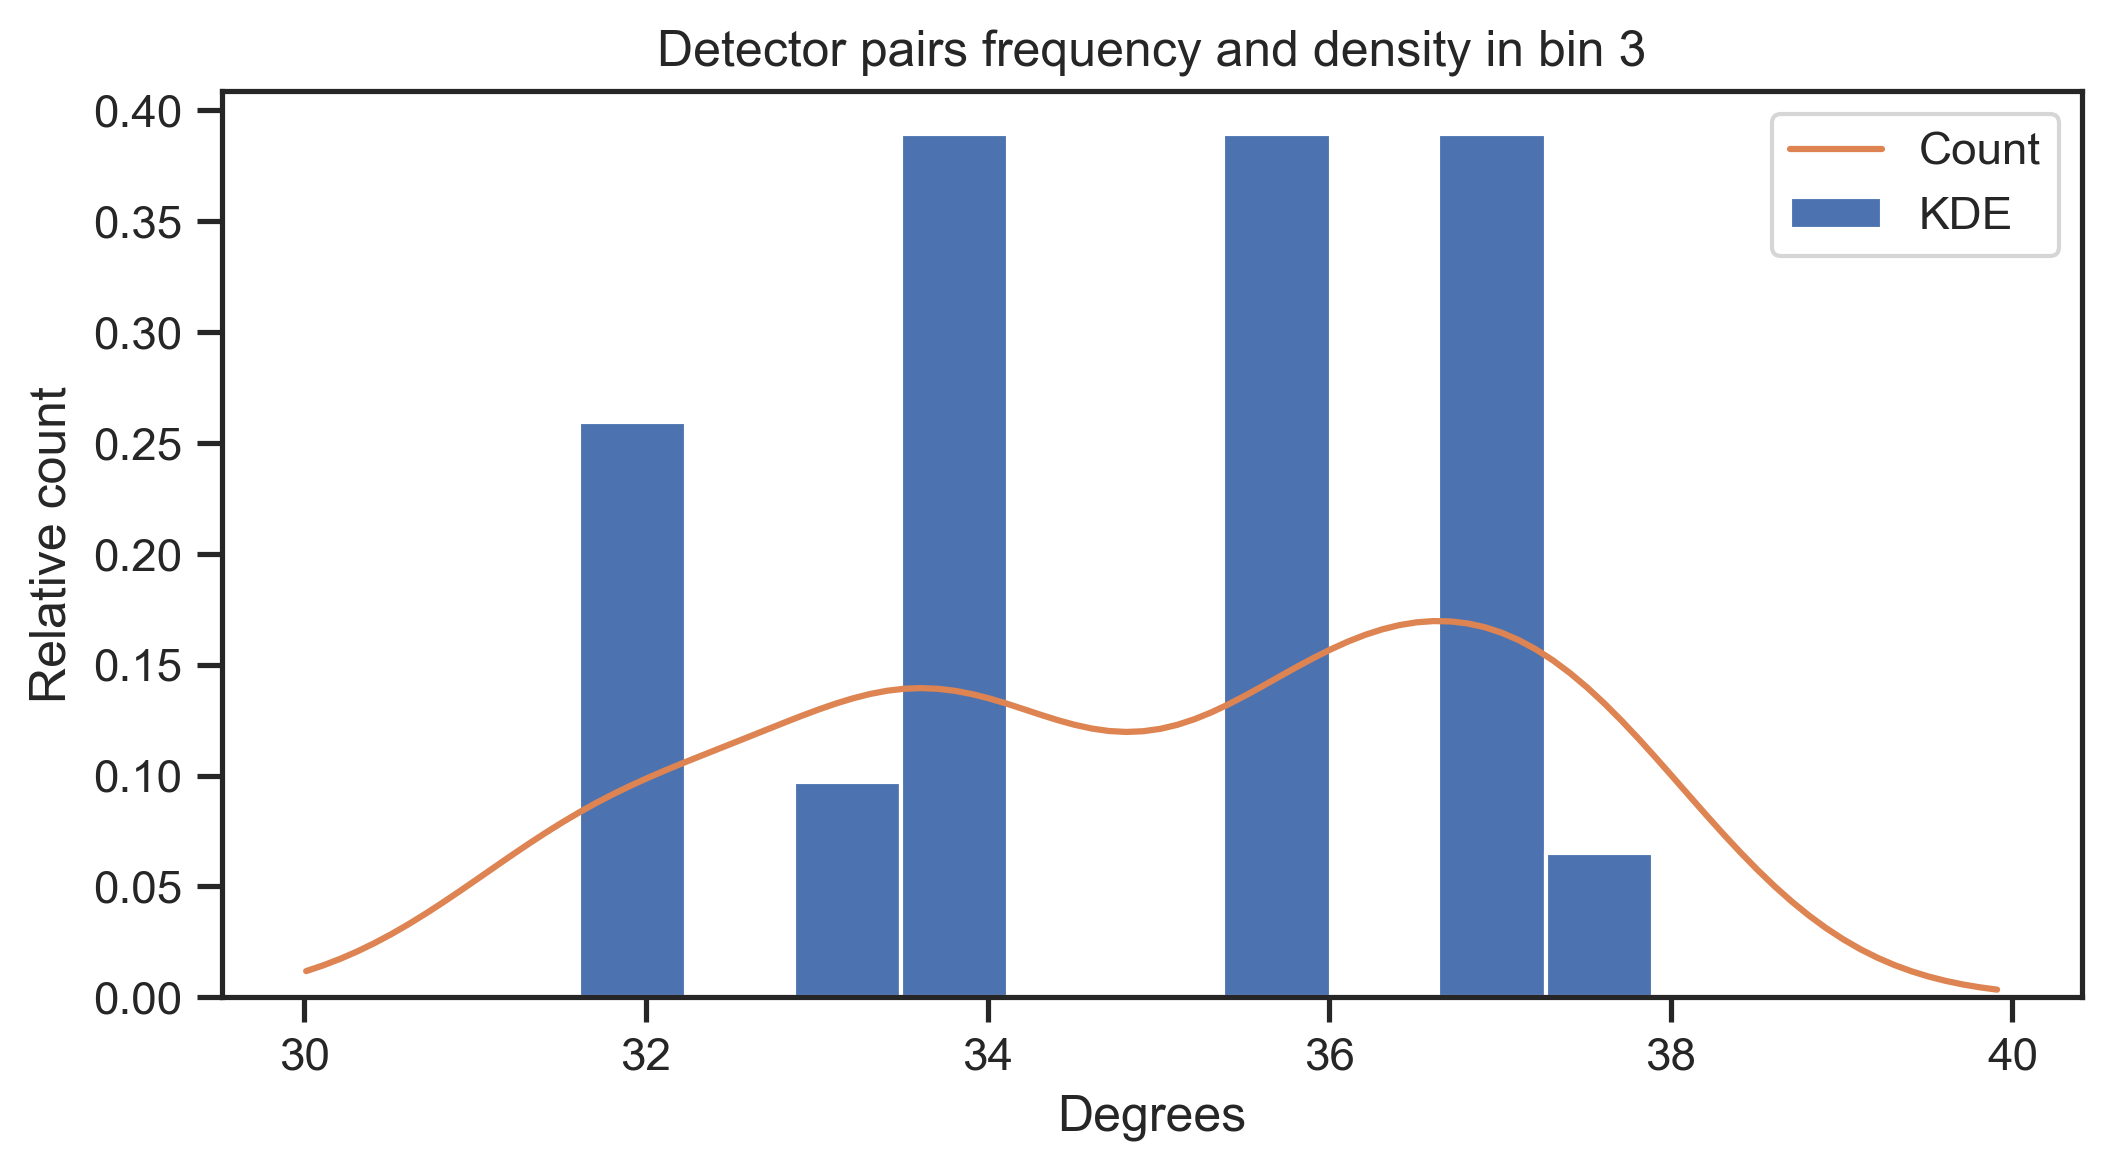

In [26]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
ax.hist(det_df[mask]['angle'].values,density=True)
ax.plot(x_step, density(x_step))
ax.set_title('Detector pairs frequency and density in bin 3')
ax.set_xlabel('Degrees')
ax.set_ylabel('Relative count')
ax.legend(['Count','KDE'])
plt.show()

For all bins:

In [27]:
np.arange(len(angle_bin_centers))+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [28]:
bin=17
mask = det_df['bin']==bin

In [29]:
bin=3
angle_bins_here = np.arange(angle_bin_edges[bin-1],angle_bin_edges[bin]+1,1)
print(angle_bins_here)

[30.01 31.01 32.01 33.01 34.01 35.01 36.01 37.01 38.01 39.01 40.01]


1


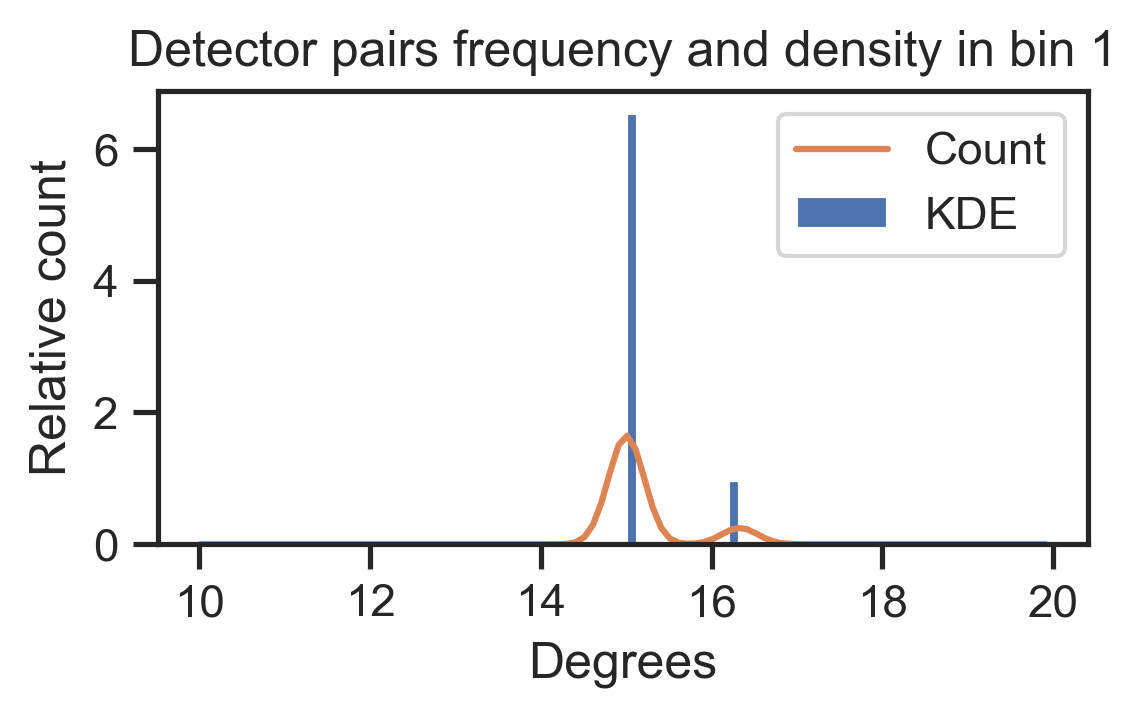

2


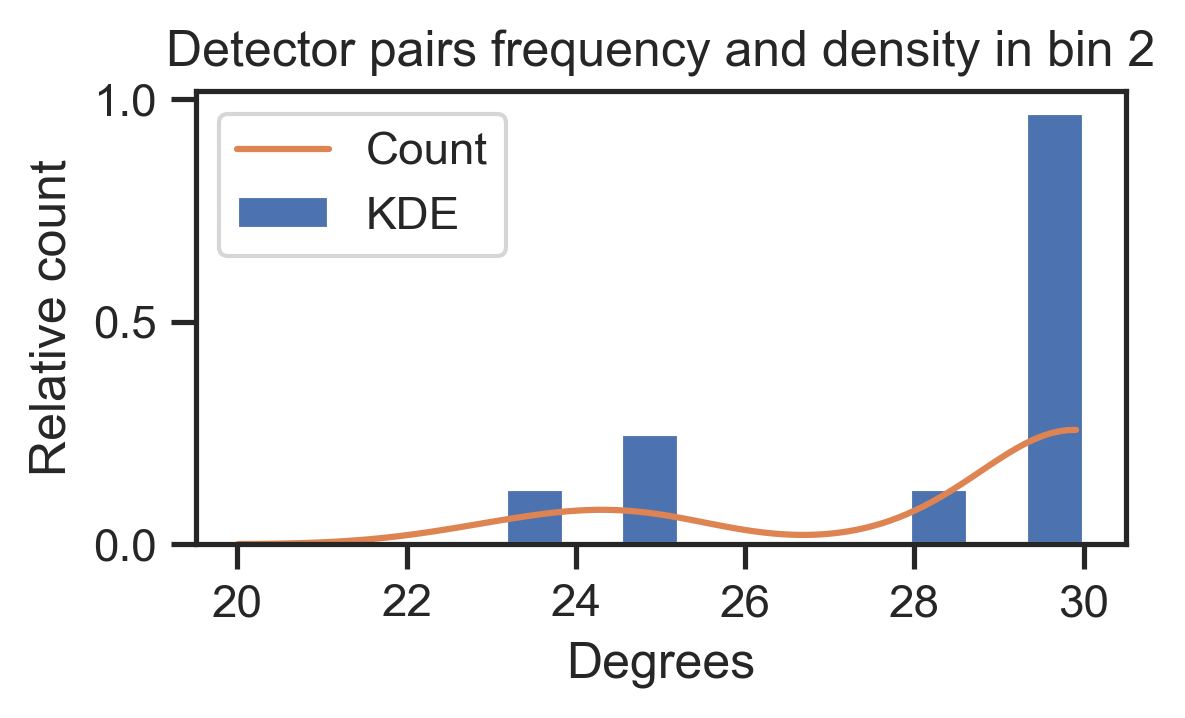

3


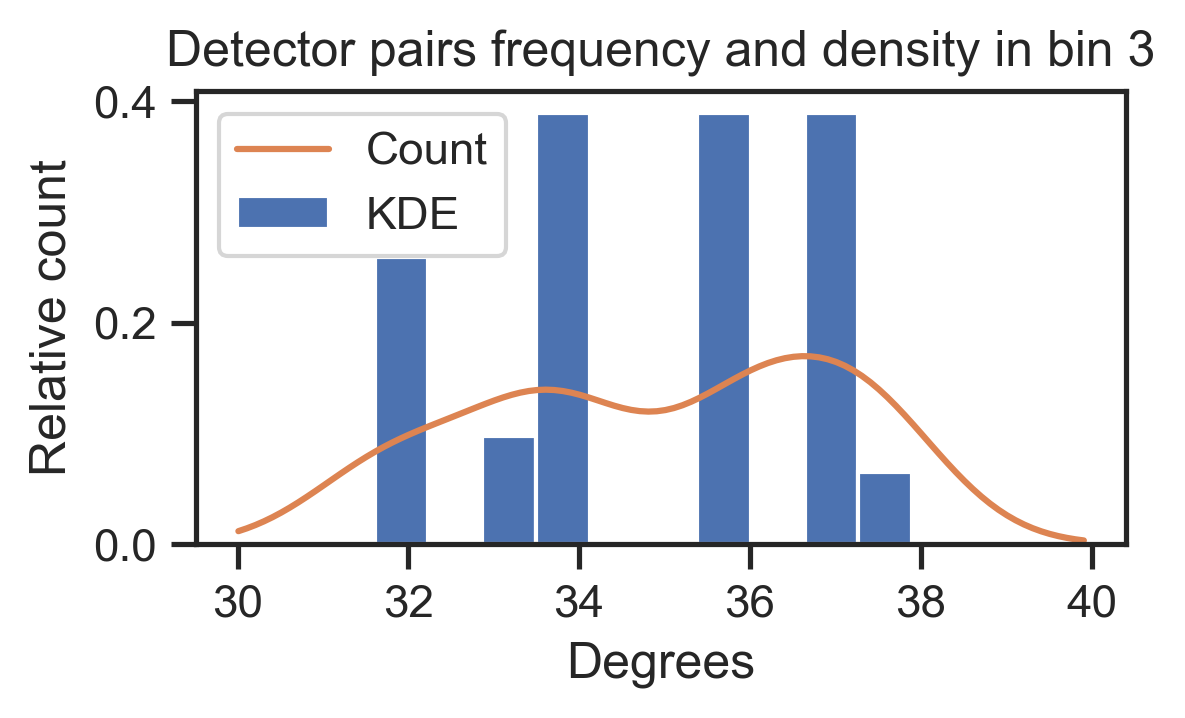

4


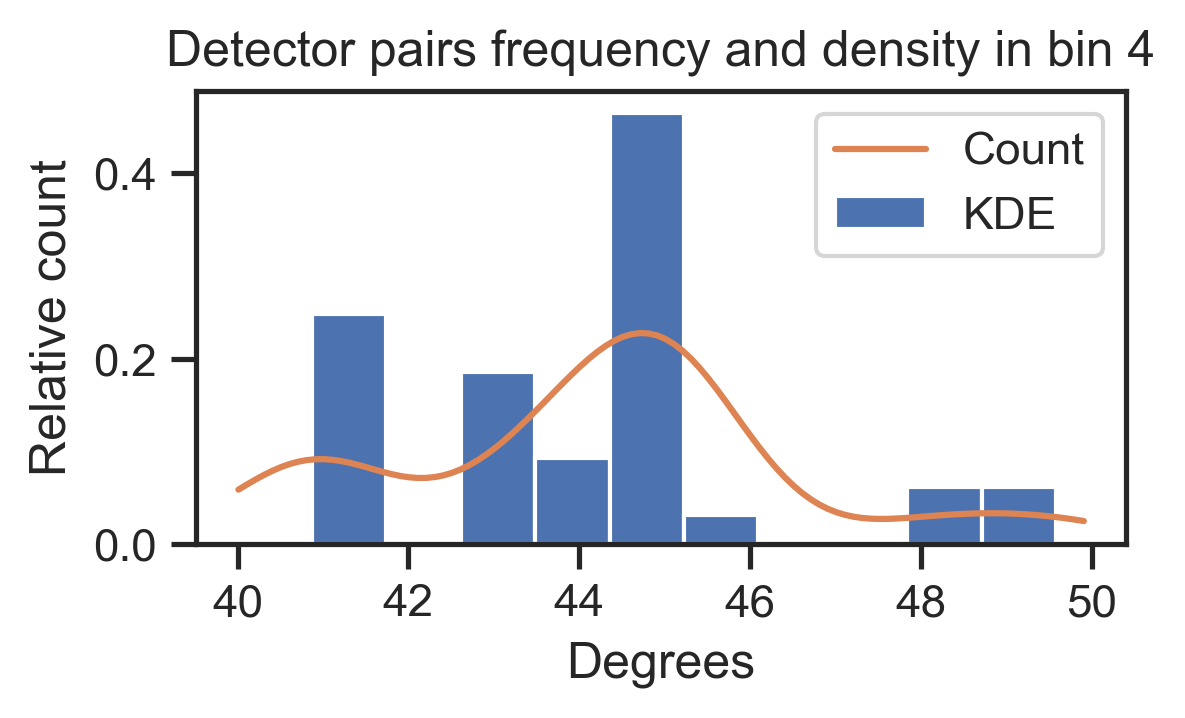

5


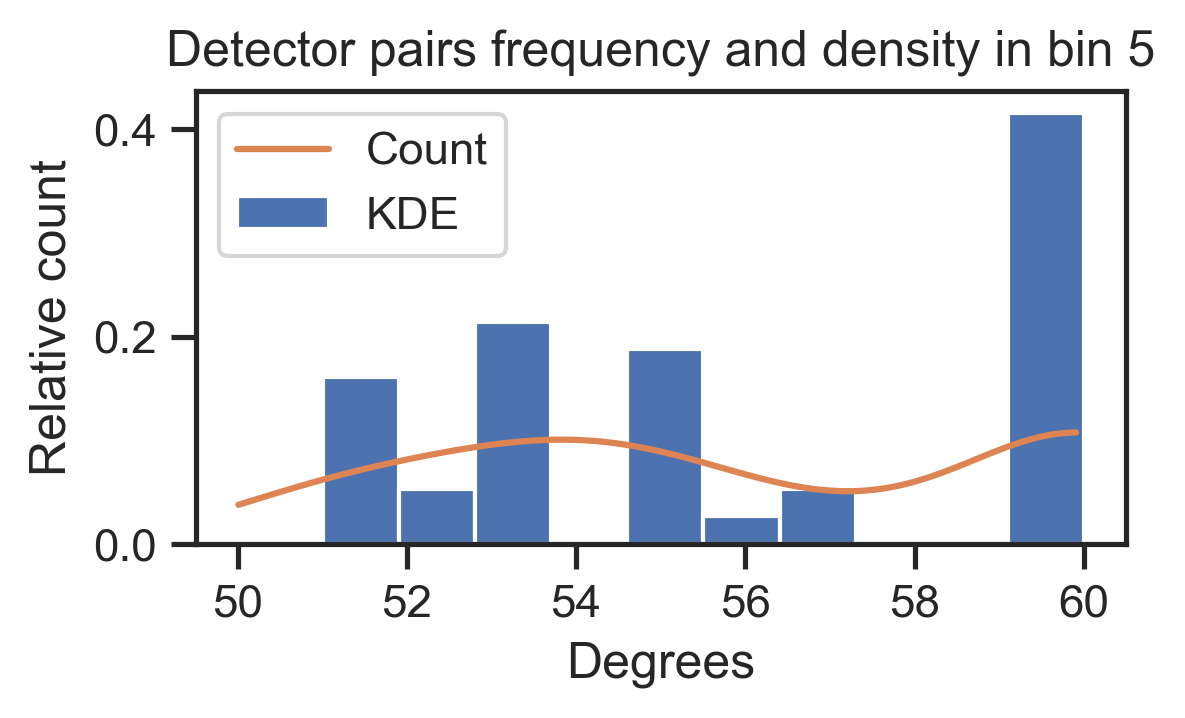

6


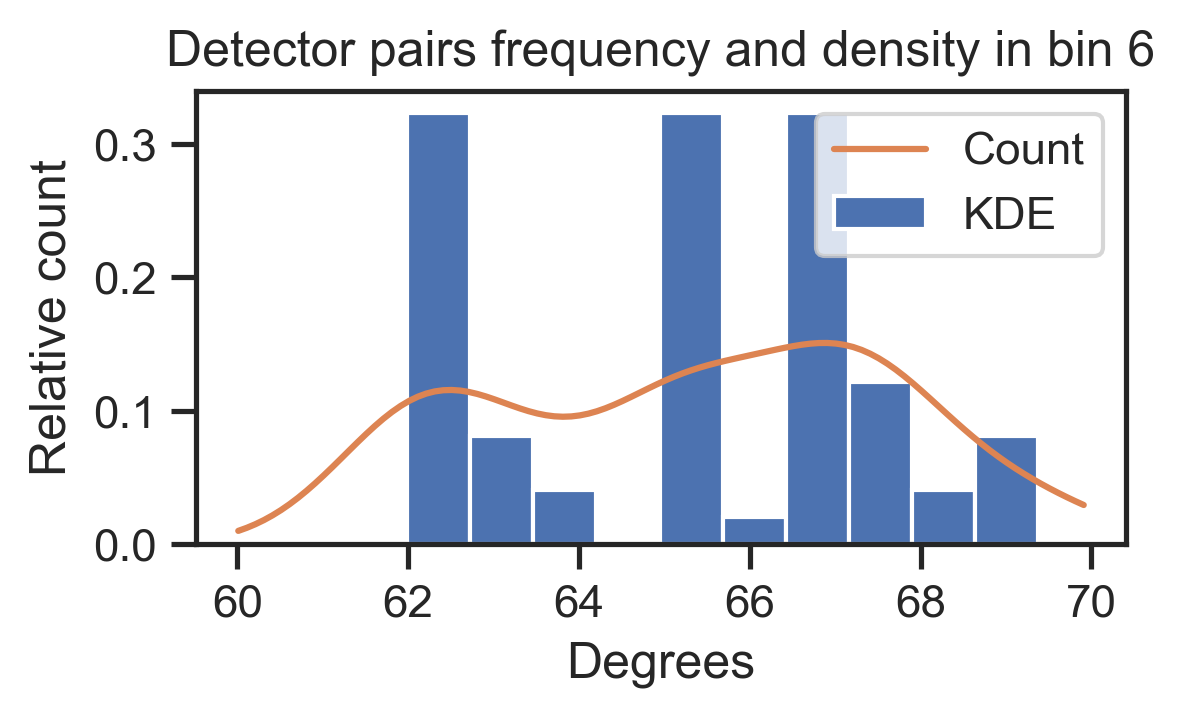

7


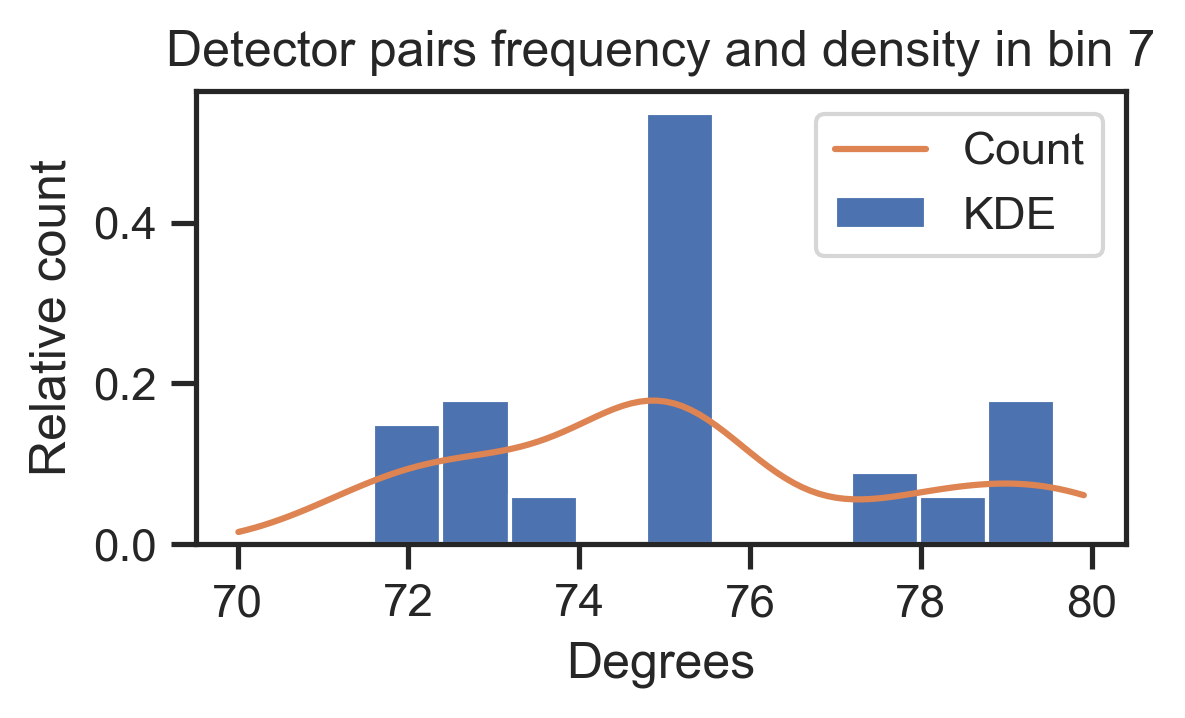

8


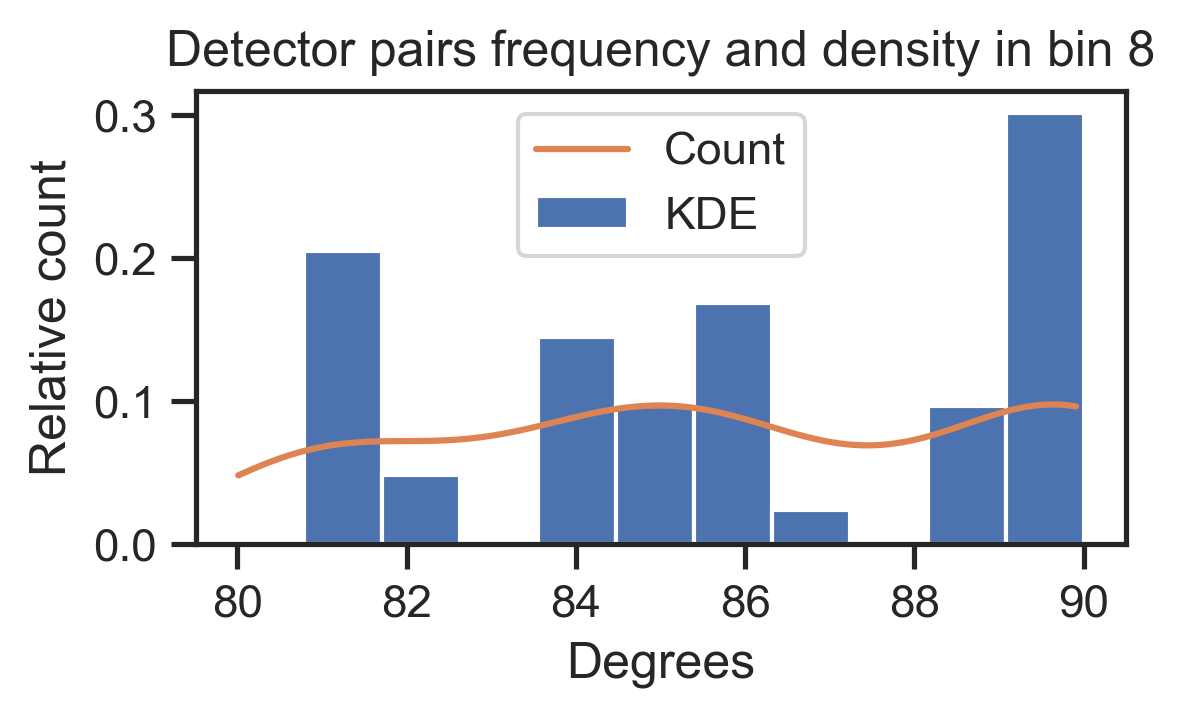

9


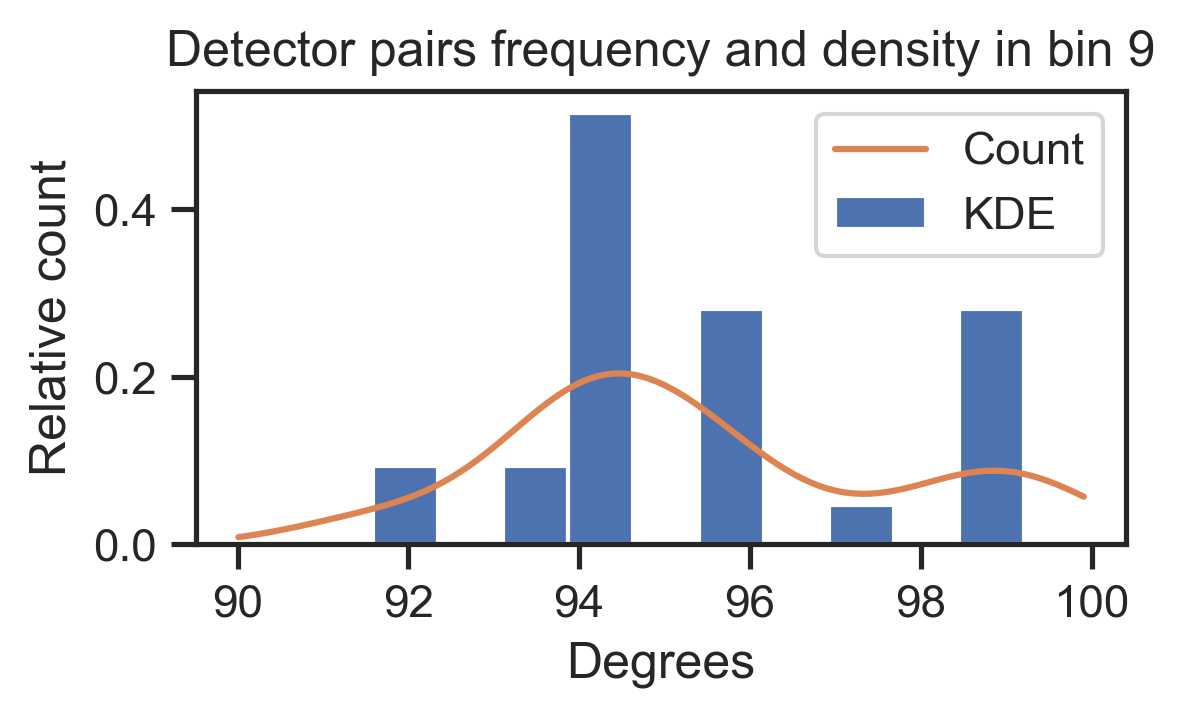

10


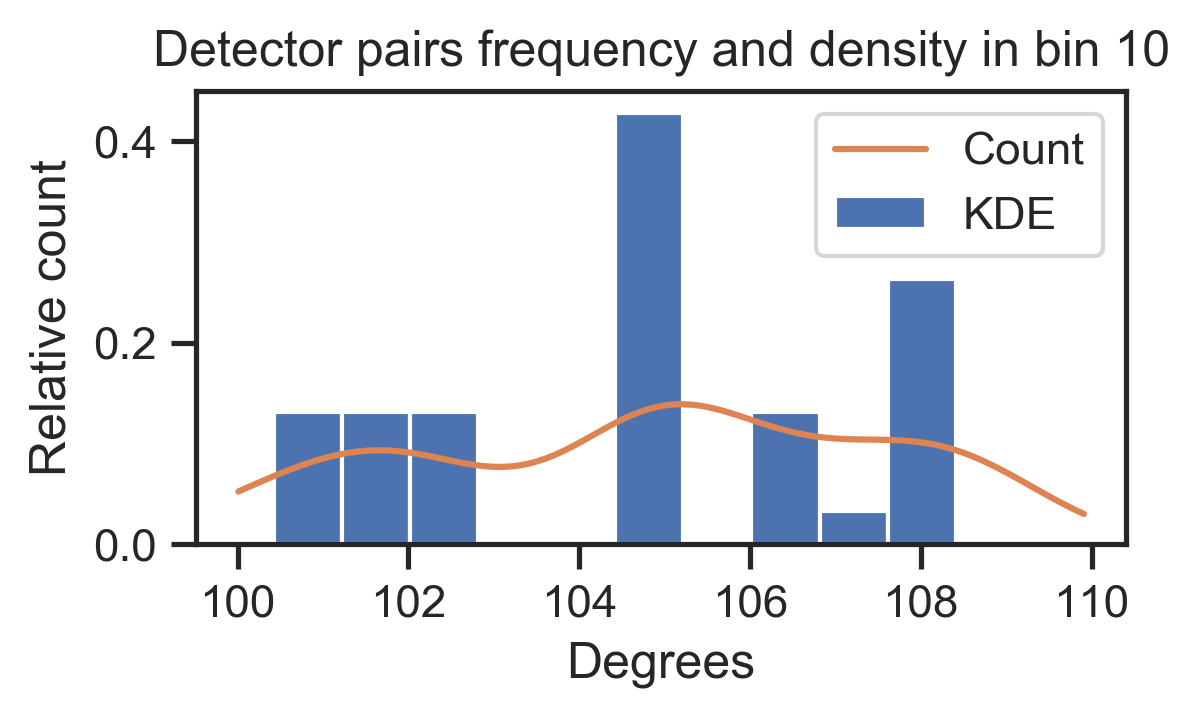

11


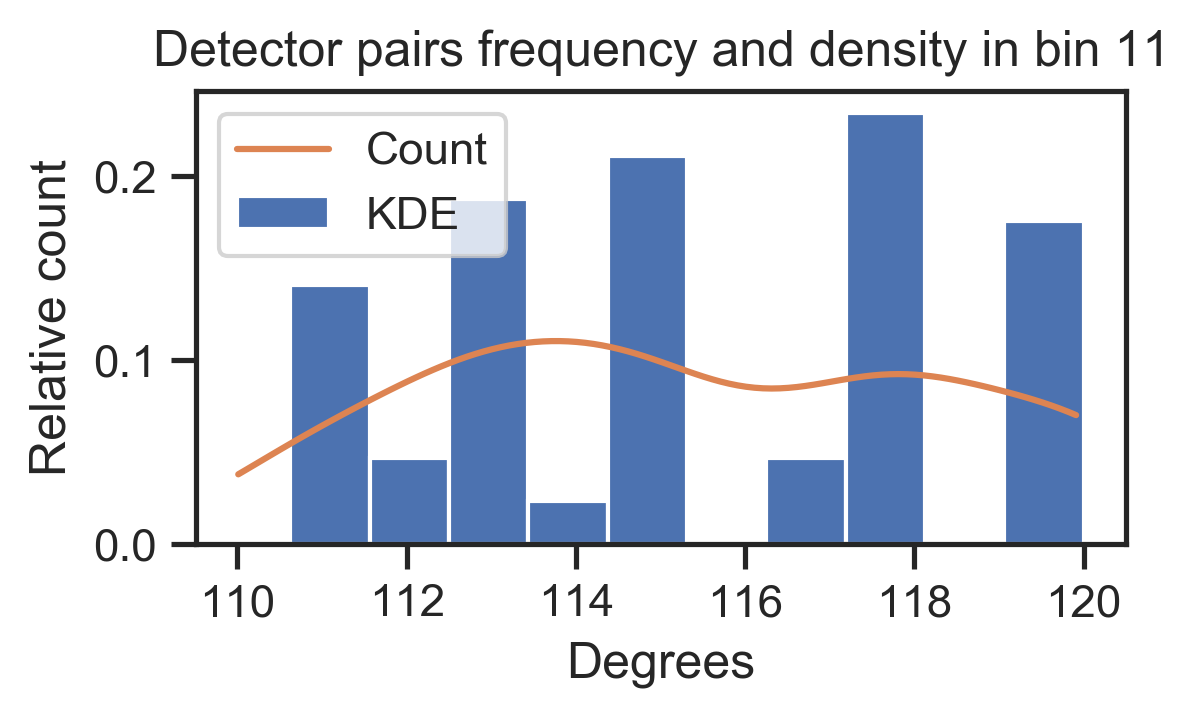

12


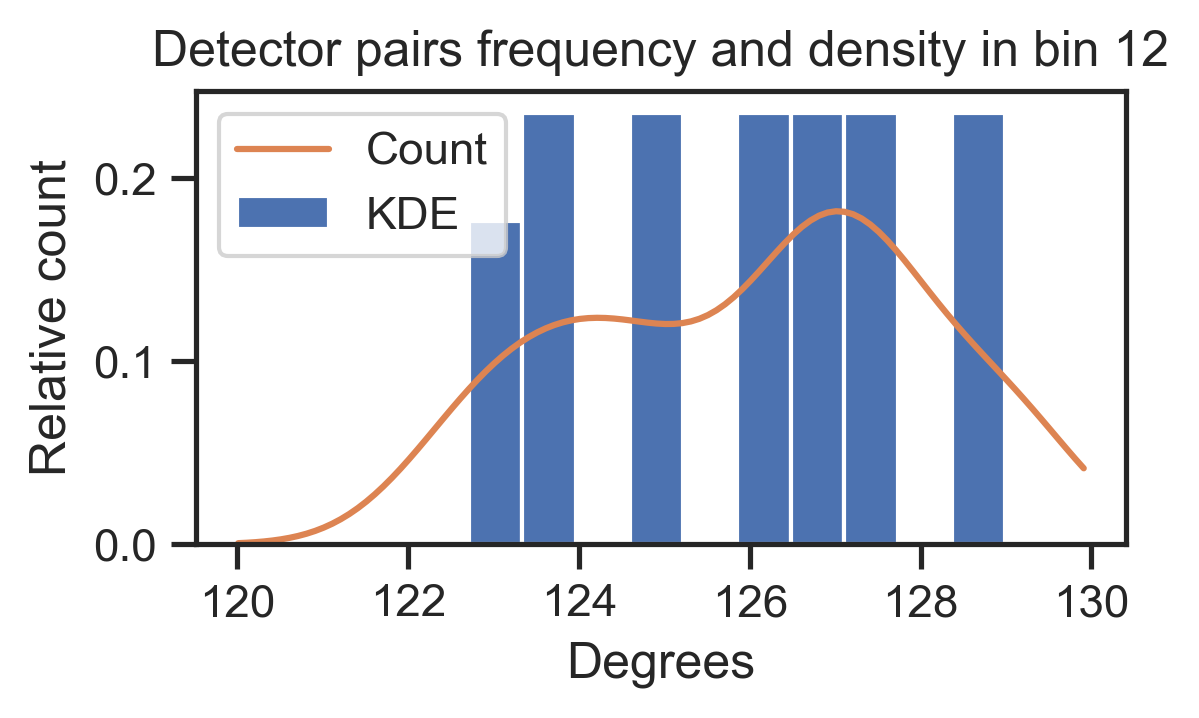

13


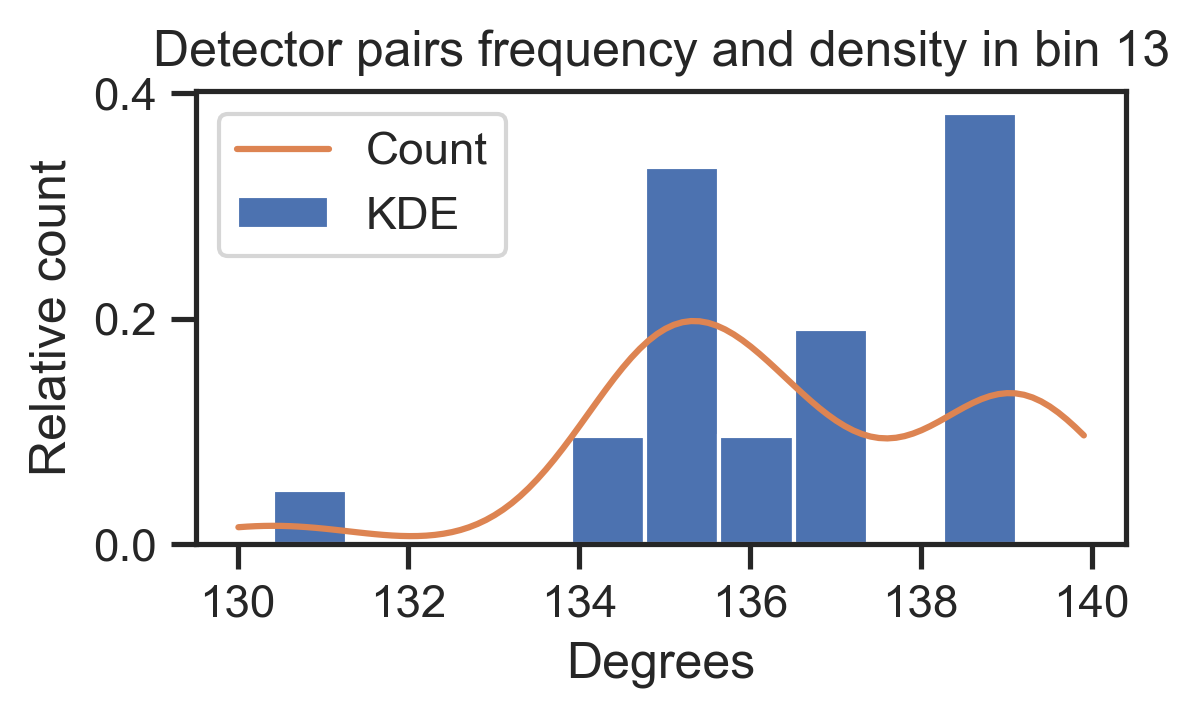

14


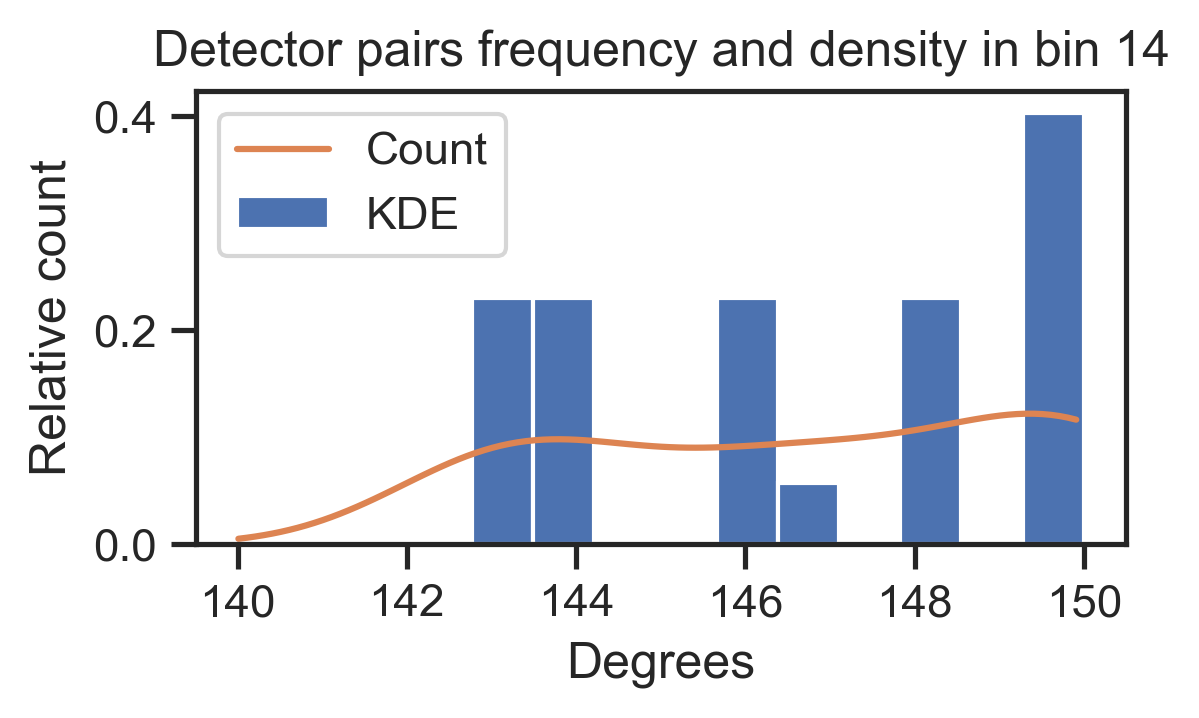

15


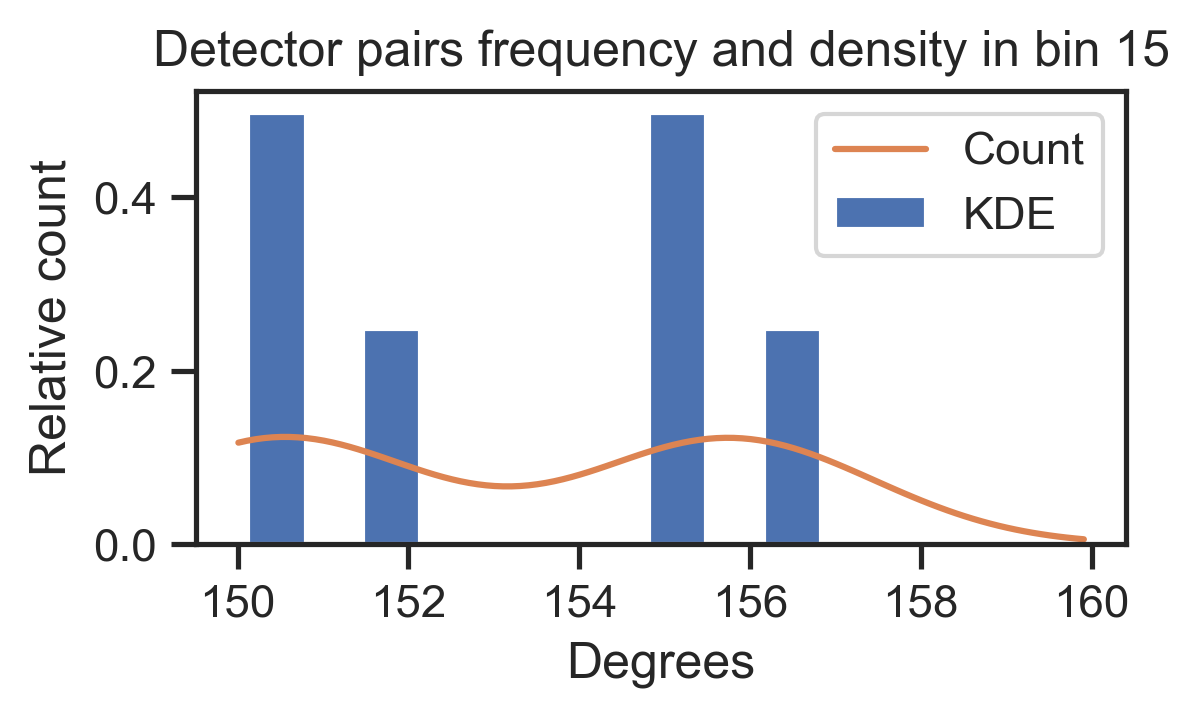

16


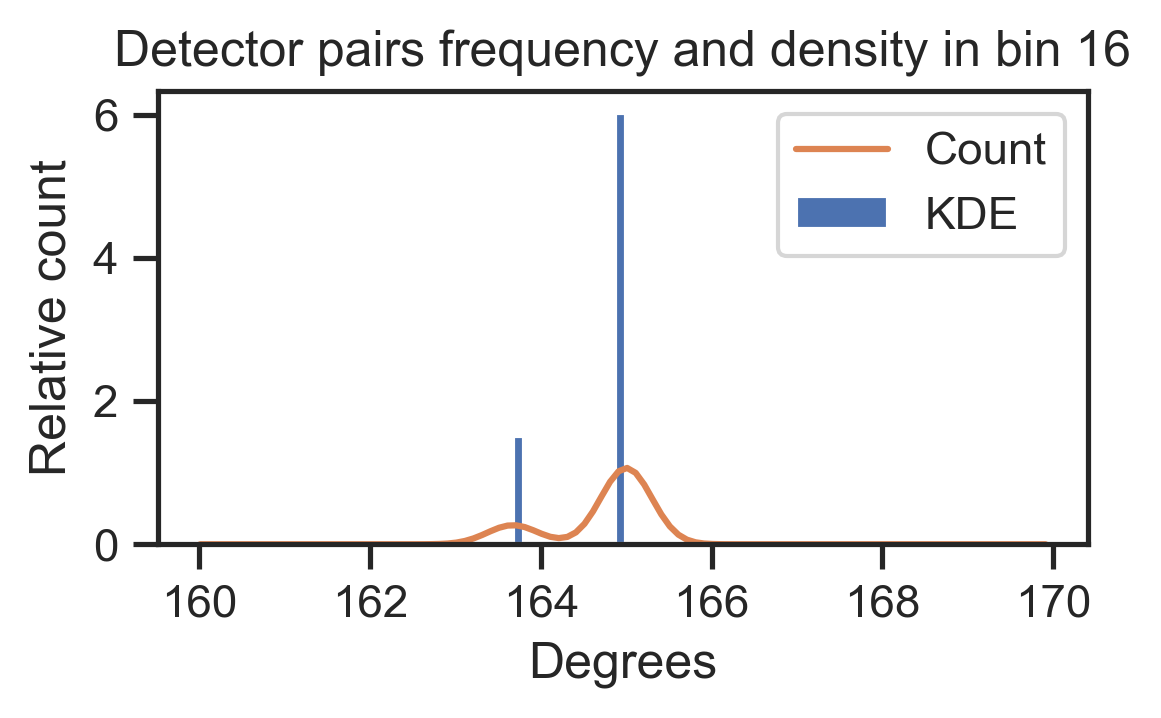

17


LinAlgError: singular matrix

In [30]:
for bin in np.arange(len(angle_bin_centers))+1:
    print(bin)
        
    # Set up angle bins in this 10-degree range
    angle_bins_here = np.arange(angle_bin_edges[bin-1],angle_bin_edges[bin]+1,1)
    x_step = np.arange(angle_bin_edges[bin-1],angle_bin_edges[bin],.1)
    
    # Slice det_df for this bin
    mask = det_df['bin'] == bin
    
    # Set up kde
    density = stats.kde.gaussian_kde(det_df[mask]['angle'].values)
    kde_curve_here = density(x_step)
    
    fig = plt.figure(figsize=(4,2))
    ax = fig.gca()
    ax.hist(det_df[mask]['angle'].values,density=True)
    ax.plot(x_step, density(x_step))
    ax.set_title('Detector pairs frequency and density in bin {}'.format(bin))
    ax.set_xlabel('Degrees')
    ax.set_ylabel('Relative count')
    ax.legend(['Count','KDE'])
    plt.show()

## Color the bar by std(angle)

In [ ]:
angle_df = pd.DataFrame(data={'angle_bin_centers':angle_bin_centers,
                              'angle_bin_min':angle_bin_edges[:-1],
                              'angle_bin_max':angle_bin_edges[1:],
                              'bin':np.arange(len(angle_bin_centers))+1,
                              'pair_counts':np.histogram(det_df['angle'],bins=angle_bin_edges)[0]})
angle_df['pair_std'] = np.nan
angle_df.head()

In [ ]:
for index, row in angle_df.iterrows():
    
    row['pair_std']
    
    mask = det_df['bin'] == row['bin']
    angle_df.loc[index,'pair_std'] = det_df[mask]['angle'].std()

In [ ]:
angle_df.head()

In [ ]:
cmap = 

In [ ]:
colors = [(i,i,i) for i in angle_df['pair_std'].values] / np.max(angle_df['pair_std'].values)

In [ ]:
fig = plt.figure(figsize=(4,3))
ax=plt.gca()

colors = [(i,i,i) for i in angle_df['pair_std'].values] / np.max(angle_df['pair_std'].values)

ax.bar(angle_df['angle_bin_centers'],
       angle_df['pair_counts'],
       width = 10,
       edgecolor = 'k',
       color=colors)
plt.show()

In [ ]:
max_std = angle_df['pair_std'].max()
max_std

In [ ]:
data_color = angle_df['pair_std'].values
data_color

In [ ]:
data_color = angle_df['pair_std'].values / np.max(angle_df['pair_std'].values)
data_color

In [ ]:
from matplotlib import cm
my_cmap = cm.get_cmap('viridis')
colors = my_cmap(data_color)

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

my_cmap = cm.get_cmap('viridis')
colors = my_cmap(data_color)

rects = ax.bar(angle_df['angle_bin_centers'], angle_df['pair_counts'],
               width=10, color=colors, edgecolor='k')

ax.set_xlabel(r'$\theta$ (degrees)')
ax.set_ylabel('Number of detector pairs')

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.yaxis.set_major_locator(MultipleLocator(20))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(4))


sm = cm.ScalarMappable(cmap=my_cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ticks=[0,0.5,1])
cbar.ax.set_yticklabels(['0','{:03.2f}'.format(3.5/2),'{:03.1f}'.format(3.5)])
cbar.set_label('Standard deviation (degrees)')

#plt.axes().set_aspect('equal')
plt.tight_layout()
bicorr_plot.save_fig_to_folder('det_df_histogram',extensions=['pdf','png'])
plt.show()